# Cas Kaggle Individual - Aprenentatge Computacional 2021-2022

Marc Garrofé Urrutia - 1565644

Anàlisi de tumors cerebrals a través d'imatges IRM

Enllaç Kaggle : https://www.kaggle.com/jakeshbohaju/brain-tumor

In [ ]:
# Imports :
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from IPython.display import Image, display
import seaborn as sns
from sklearn.datasets import make_regression

import scipy.stats
%matplotlib notebook

import warnings
warnings.simplefilter("ignore")

In [283]:
# Constants :
IMG_DATASET_PATH = 'data/Img/Brain Tumor'
CSV_DATASET_PATH = 'data/Brain Tumor.csv'
IMG_RES_X = 240
IMG_RES_Y = 240

In [284]:
# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset(CSV_DATASET_PATH)

# Guardem dades d'entrada
x = dataset.values[:,2:-1]
# Guardem dades sortida
y = dataset.values[:,1:2]

print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (3762, 15)
Dimensionalitat de les entrades X (3762, 12)
Dimensionalitat de l'atribut Y (3762, 1)


In [285]:
print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())

Per comptar el nombre de valors no existents:
Image                 0
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64


Observem que no hi han dades NULL. Això ens serà molt útil perquè facilita molt l'anàlisi de dades al no haver de tractar forats en blanc al dataset.

In [286]:
# Per visualitzar les primeres 5 mostres de la BBDD:
dataset.head()                

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535,619.588,24.892,0.109,4.276,18.901,98.614,0.293,0.086,0.531,4.473,0.982,0.000
1,Image2,0,8.750,805.958,28.389,0.267,3.718,14.465,63.859,0.475,0.226,0.651,3.220,0.989,0.000
2,Image3,1,7.341,1143.808,33.820,0.001,5.062,26.480,81.867,0.032,0.001,0.268,5.982,0.978,0.000
3,Image4,1,5.958,959.712,30.979,0.001,5.678,33.429,151.230,0.032,0.001,0.244,7.701,0.964,0.000
4,Image5,0,7.315,729.541,27.010,0.147,4.283,19.079,174.989,0.344,0.118,0.501,6.835,0.973,0.000


In [287]:
# Per veure estadístiques dels atributs numèrics de la BBDD:
dataset.describe()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000,3762.000,3762.000,3762.000,3762.000,3762.000,3762.000,3762.000,3762.000,3762.000,3762.000,3762.000,3762.000,3762.000
mean,0.447,9.489,711.101,25.182,0.074,4.103,24.389,127.961,0.205,0.059,0.479,4.698,0.956,0.000
std,0.497,5.728,467.467,8.774,0.070,2.561,56.435,109.500,0.129,0.058,0.128,1.850,0.026,0.000
min,0.000,0.079,3.146,1.774,0.001,1.886,3.942,3.195,0.025,0.001,0.105,0.681,0.549,0.000
25%,0.000,4.982,363.225,19.058,0.007,2.620,7.253,72.125,0.070,0.005,0.365,3.412,0.947,0.000
50%,0.000,8.478,622.580,24.952,0.067,3.422,12.359,106.737,0.225,0.051,0.513,4.482,0.962,0.000
75%,1.000,13.213,966.954,31.096,0.113,4.652,22.640,161.059,0.299,0.089,0.576,5.724,0.971,0.000
max,1.000,33.240,2910.582,53.950,0.395,36.931,1371.640,3382.574,0.590,0.348,0.811,27.828,0.990,0.000


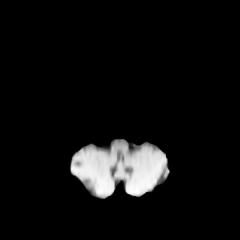

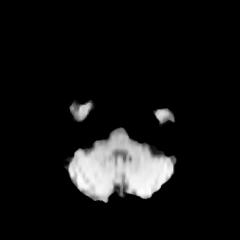

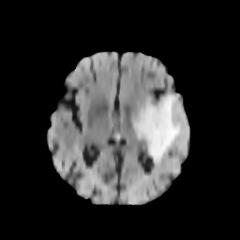

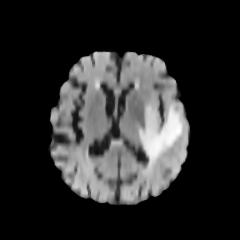

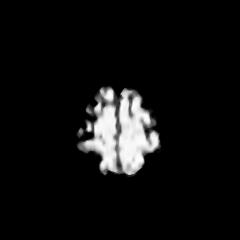

In [288]:
def showImg(dataset):
    """
    Given a dataset, shows the brain image
    :param dataset: Pandas DataFrame object
    """
    for img in dataset.iloc[:,0]:
        path = IMG_DATASET_PATH +"/" + img + ".jpg"
        display(Image(filename=path))
    

showImg(dataset.head())        

In [289]:
# Mostrem atribut 1 o Atribut Objectiu
plt.figure()
dataset['Class'].value_counts().plot(kind='bar', rot=0)
plt.xlabel('Classificació de la mostra')
plt.ylabel('Número de mostres')

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Número de mostres')

In [290]:
# Mostrem la distribució de les dades segons la correlació
# pd.plotting.scatter_matrix(dataset.drop(['Image'], axis=1), figsize=(20,20))
# plt.savefig('scatter_matrix.png')

### FEATURE SELECTION

Consisteix en seleccionar aquells atributs més rellevants per reduir el nombre de variables amb les que treballarem.

Aquesta funció té un impacte en el cost computacional perquè disminueixm el temps necessari de calcul.

PERDEM SCORE, 3 PUNTS MENYS

In [291]:
# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = dataset.corr()

plt.figure()

sns.heatmap(correlacio, annot=True, linewidths=.5)
# plt.savefig('heatmap_correlacio.png')

<IPython.core.display.Javascript object>

<AxesSubplot:>

A continuació analitzarem la correlació entre les dades. Observem el següent:
Aquelles més relacionades amb l'estat objectiu, és a dir l'atribut "Class":
* Entropy
* Energy
* ASM
* Homogenity

Tot seguit apliquem la "Feature Selection", i comprovarem si és necessari eliminar aquells atributs que no influeixen en l'aprenentatge del model:

El primer atribut que eliminarem és l'identificador d'imatge que té per label : "Image".

In [292]:
# dataset = dataset.drop('Image', axis=1)
# Eliminem variables que no són rellevants o no tenen un impacte significatiu a l'hora de decidir la classe d'una imatge
# dataset = dataset.drop(['Mean', 'Variance', 'Coarseness', 'Contrast', 'Correlation', 'Dissimilarity', 'Image', 'Kurtosis', 'Skewness'], axis=1)
dataset = dataset.drop('Image', axis=1)
list_features = ['Mean', 'Variance', 'Coarseness', 'Contrast', 'Correlation', 'Dissimilarity', 'Kurtosis', 'Skewness']

# Guardem dades d'entrada
x = dataset.values[:,1:-1]

# Guardem dades sortida
y = dataset.values[:,0]


Definim funció per gestionar la estandarització de les dades

In [293]:
def featureSelection(dataset, list_features):
    """
    Donada una llista dels atributs NO rellevants, els elimina del dataset
    :param dataset: Objecte DataFrame amb les dades del dataset
    :param list_features: Llista amb els labels de les columnes a eliminar
    :return: Dataset amb les columnes rebudes eliminades
    """
    return dataset.drop(list_features, axis=1)

Abans de realitzar el training, s'han de barrejar les dades

In [294]:
# Escalament de les dades
#StandardScaler()
#scaler.fit(x)
#X = scalar.transform(x)

In [295]:
# Mirem la relació entre atributs utilitzant la funció pairplot
sns.pairplot(featureSelection(dataset, list_features))

<IPython.core.display.Javascript object>

In [296]:
"""
sns.pairplot(featureSelection(dataset, list_features),
                        x_vars=["Entropy", "Energy", "ASM", "Homogeneity"],
                        y_vars=["Class"]
                       )
"""

'\nsns.pairplot(featureSelection(dataset, list_features),\n                        x_vars=["Entropy", "Energy", "ASM", "Homogeneity"],\n                        y_vars=["Class"]\n                       )\n'

# ESTANDARITZACIÓ DE LES DADES
A continuació es normalitzaran les dades per tal de poder 

In [297]:
from sklearn.preprocessing import StandardScaler
def standaritzador(data):
    """
    Given a DataFrame, standarizes all the columns
    :param data: DataFrame data
    :return: DataFrame data standarized
    """
    scaler = StandardScaler()
    scaler.fit(data)
    return scaler.transform(data)

# GRÀFIQUES I ESTADÍSTIQUES DELS MODELS
Definim funcions per mostrar el comportament del model i poder així comparar-los

In [298]:
def printModelScore(model, X_train, y_train, X_test, y_test):
    """
    Given a models and the train and test data, prints the model score and MSE in training and test
    :param model: Model
    :param X_train: Input data train
    :param y_train: Outuput data train
    :param X_test: Input data test
    :param y_test: Outuput data test
    """
    print ('Training Score:', model.score(X_train, y_train) )
    print ('Testing Score:', model.score(X_test, y_test) )
    print ('Training MSE: ', np.mean((model.predict(X_train) - y_train)**2))
    print ('Testing MSE: ', np.mean((model.predict(X_test) - y_test)**2))

# DIVISIÓ EN TRAIN i TEST

Una vegada hem visualitzat totes les dades, les separem en train i test per tal de no barrejar les dades.
Farem una divisió simple amb la funció propia de sklearn anomenada : train_test_split()

Abans pero, eliminarem aquelles columnes que hem vist que no tenen un grau de correl·lació tan elevat i posteriorment farem la divisió de train i test.

In [299]:
from sklearn.model_selection import train_test_split

# Divisió Train i Test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Separat el dataset en train i test,


# SELECCIÓ DEL MODEL
Utilitzarem diferents models de classificació, juntament amb l'eina Grid Search, per trobar el model que ens dongui millors resultats. Els models que es provaran:
* Regrsssor Logístic
* Gradient Descent


Definim també una funció que ens mostrarà la informació d'aplicar el Grid Search

In [300]:
from sklearn.model_selection import GridSearchCV

def gridSearch(estimator, param_grid, model_name, dataset, standaritze=False):
    """
    Executes the GridSearchCV function ans shows the statistics
    :param estimator: Model object to be tested
    :param param_grid: Dict with the diferent values to be tested
    :param model_name: String with the title to be shown
    :param dataset: DataFrame amb la informació i dades del dataset
    :param standarize: Boleà que estandaritza les dades d'entrada en cas de ser True
    """
    x = dataset.values[:,1:-1] # Guardem dades d'entrada
    if standaritze:
        x = standaritzador(x)
    y = dataset.values[:,0] # Guardem dades sortida
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    print(model_name)
    print(grid_search.best_params_)
    print(grid_search.best_score_)

Profe recomana classificador??

Pero tambe que es bo combinar diferents models?? -> Combianció de models

Bagging and Boosting??

Recall?? -> Seleccionar Treshall

## REGRESOR LOGISTIC

A continuació s'aplicarà un regresor logistic i s'obtindrà unes mètriques per estudiar el seu comportament.
Definim els paràmetres del Grid Search i preparem les dades del model

In [302]:
param_grid = [
    {
        'penalty' : ['l2'],
        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'warm_start' : ['True', 'False']
    },
    {
        'penalty' : ['l1'],
        'solver' : ['liblinear', 'saga'],
        'warm_start' : ['True', 'False']
    }
]

from sklearn import linear_model

logistic_regressor = linear_model.LogisticRegression() # Definim model reg. logistic
gridSearch(logistic_regressor, param_grid, 'Logistic Regression', dataset) # Crida funció que entrena i mostra resultats

logistic_regressor = linear_model.LogisticRegression()
gridSearch(logistic_regressor, param_grid, 'Logistic Regression & Estandarització', dataset, standaritze=True)

logistic_regressor = linear_model.LogisticRegression()
gridSearch(logistic_regressor, param_grid, 'Logistic Regression & Feature Selection', featureSelection(dataset, list_features))

logistic_regressor = linear_model.LogisticRegression()
gridSearch(logistic_regressor, param_grid, 'Logistic Regression & Feature Selection & Estandarització', featureSelection(dataset, list_features), standaritze=True)


Logistic Regression
{'penalty': 'l1', 'solver': 'liblinear', 'warm_start': 'False'}
-0.018612419823810795
Logistic Regression & Estandarització
{'penalty': 'l1', 'solver': 'liblinear', 'warm_start': 'True'}
-0.014811581446021313
Logistic Regression & Feature Selection
{'penalty': 'l1', 'solver': 'liblinear', 'warm_start': 'True'}
-0.028478871003816714
Logistic Regression & Feature Selection & Estandarització
{'penalty': 'l2', 'solver': 'newton-cg', 'warm_start': 'True'}
-0.02582737498286448


Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython_darwin_38_64.pyx", line 1034, in _pydevd_bundle.pydevd_cython_darwin_38_64.PyDBFrame.trace_dispatch
  File "/Users/marcgarrofe/Library/Application Support/JetBrains/Toolbox/apps/IDEA-U/ch-0/212.5457.46/IntelliJ IDEA.app.plugins/python/helpers-pro/jupyter_debug/pydev_jupyter_plugin.py", line 144, in cmd_step_over
    if _is_inside_jupyter_cell(frame, pydb):
  File "/Users/marcgarrofe/Library/Application Support/JetBrains/Toolbox/apps/IDEA-U/ch-0/212.5457.46/IntelliJ IDEA.app.plugins/python/helpers-pro/jupyter_debug/pydev_jupyter_plugin.py", line 209, in _is_inside_jupyter_cell
    if is_cell_filename(filename):
  File "/Users/marcgarrofe/Library/Application Support/JetBrains/Toolbox/apps/IDEA-U/ch-0/212.5457.46/IntelliJ IDEA.app.plugins/python/helpers-pro/jupyter_debug/pydev_jupyter_plugin.py", line 220, in is_cell_filename
    ipython_shell = get_ipython()
NameError: name 'get_ipython' is not defined


Una vegada entrenat el model, creem una funció per obtenir les estadístiques del model



## GRADIENT DESCENT

El Descens de Gradient és un algorisme d'optimització que ajusta el valors dels pesos de cada atribut per tal de reduir l'error o el MSE fa augmentar la accuraccy.

In [ ]:
param_grid = {
        'penalty' : ['l2', 'l1', 'elasticent'],
        'alpha' : [0.00001, 0.0001, 0.001],
        'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive'],
        'warm_start' : ['True', 'False'],
        'max_iter' : [5000],
        'shuffle' : [True, False],
        'class_weight' : ['None', 'balanced'],
        'fit_intercept' : [True, False]
    }

from sklearn.linear_model import SGDClassifier
gradient_descent = SGDClassifier()
gridSearch(gradient_descent, param_grid, 'Gradient Descent', dataset)

gradient_descent = SGDClassifier()
gridSearch(gradient_descent, param_grid, 'Gradient Descent & Estandarització', dataset, standaritze=True)

gradient_descent = SGDClassifier()
gridSearch(gradient_descent, param_grid, 'Gradient Descent & Feature Selection ', featureSelection(dataset, list_features))

gradient_descent = SGDClassifier()
gridSearch(gradient_descent, param_grid, 'Gradient Descent & Estandarització & Feature Selection', featureSelection(dataset, list_features), standaritze=True)

## SVC


In [ ]:
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma' : ['scale', 'auto'],
    'class_weight' : ['None', 'balanced']
}

from sklearn.svm import SVC
svc = SVC(max_iter=10)
gridSearch(svc, param_grid, 'Gradient Descent', dataset)